In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heroinUsers = pd.read_excel('./tables/drugOffenses/heroinUsers.xlsx')
heroinSuppliers = pd.read_excel('./tables/drugOffenses/heroinSuppliers.xlsx')

heroinUsers = heroinUsers.drop(columns='Unnamed: 15').drop(columns=2004)
heroinSuppliers = heroinSuppliers.drop(columns='Unnamed: 15').drop(columns=2004)

heroinUsers.drop(heroinUsers.tail(2).index,inplace=True)
heroinSuppliers.drop(heroinSuppliers.tail(2).index,inplace=True)

cannabisUsers = pd.read_excel('./tables/drugOffenses/cannabisUsers.xlsx')
cannabisSuppliers = pd.read_excel('./tables/drugOffenses/cannabisSuppliers.xlsx')

cannabisUsers = cannabisUsers.drop(columns='Unnamed: 15').drop(columns=2004)
cannabisSuppliers = cannabisSuppliers.drop(columns='Unnamed: 15').drop(columns=2004)

cannabisUsers.drop(cannabisUsers.tail(2).index,inplace=True)
cannabisSuppliers.drop(cannabisSuppliers.tail(2).index,inplace=True)

cocaineUsers = pd.read_excel('./tables/drugOffenses/cocaineUsers.xlsx')
cocaineSuppliers = pd.read_excel('./tables/drugOffenses/cocaineSuppliers.xlsx')

cocaineUsers = cocaineUsers.drop(columns='Unnamed: 15').drop(columns=2004)
cocaineSuppliers = cocaineSuppliers.drop(columns='Unnamed: 15').drop(columns=2004)

cocaineUsers.drop(cocaineUsers.tail(2).index,inplace=True)
cocaineSuppliers.drop(cocaineSuppliers.tail(2).index,inplace=True)

ecstasyUsers = pd.read_excel('./tables/drugOffenses/ecstasyUsers.xlsx')
ecstasySuppliers = pd.read_excel('./tables/drugOffenses/ecstasySuppliers.xlsx')

ecstasyUsers = ecstasyUsers.drop(columns='Unnamed: 15').drop(columns=2004)
ecstasySuppliers = ecstasySuppliers.drop(columns='Unnamed: 15').drop(columns=2004)

ecstasyUsers.drop(ecstasyUsers.tail(2).index,inplace=True)
ecstasySuppliers.drop(ecstasySuppliers.tail(2).index,inplace=True)

In [3]:
topheroinUsers = heroinUsers.sort_values(by= 2017, ascending=False).head(8)

In [4]:
turkeyUsers = topheroinUsers[topheroinUsers['Country'] == 'Turkey'].to_numpy()
turkeyUsers = np.delete(turkeyUsers, 0)

germanyUsers = topheroinUsers[topheroinUsers['Country'] == 'Germany'].to_numpy()
germanyUsers = np.delete(germanyUsers, 0)

spainUsers = topheroinUsers[topheroinUsers['Country'] == 'Spain'].to_numpy()
spainUsers = np.delete(spainUsers, 0)

italyUsers = topheroinUsers[topheroinUsers['Country'] == 'Italy'].to_numpy()
italyUsers = np.delete(italyUsers, 0)

austriaUsers = topheroinUsers[topheroinUsers['Country'] == 'Austria'].to_numpy()
austriaUsers = np.delete(austriaUsers, 0)

greeceUsers = topheroinUsers[topheroinUsers['Country'] == 'Greece'].to_numpy()
greeceUsers = np.delete(greeceUsers, 0)

belgiumUsers = topheroinUsers[topheroinUsers['Country'] == 'Belgium'].to_numpy()
belgiumUsers = np.delete(belgiumUsers, 0)

portugalUsers = topheroinUsers[topheroinUsers['Country'] == 'Portugal'].to_numpy()
portugalUsers = np.delete(portugalUsers, 0)

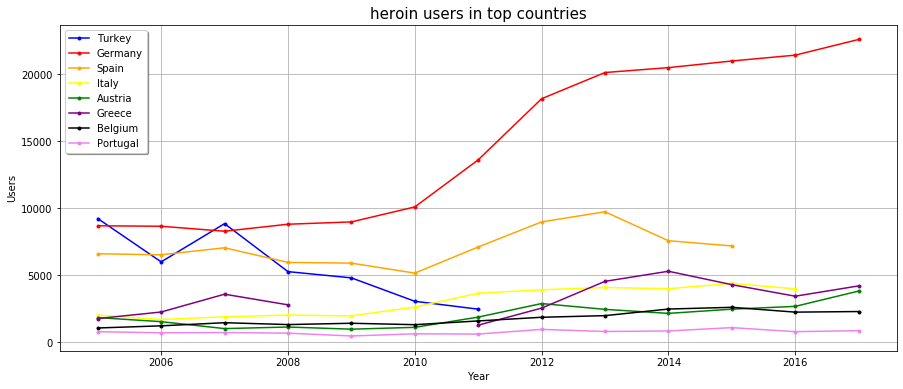

In [5]:
plt.figure(figsize=(15,6))
years = [i for i in range(2005, 2018)]    
plt.plot(years, turkeyUsers, label='Turkey', color="blue", marker = ".")
plt.plot(years, germanyUsers, label='Germany', color="red", marker = ".")
plt.plot(years, spainUsers, label='Spain', color="orange", marker = ".")
plt.plot(years, italyUsers, label='Italy', color="yellow", marker = ".")
plt.plot(years, austriaUsers, label='Austria', color="green", marker = ".")
plt.plot(years, greeceUsers, label='Greece', color="purple", marker = ".")
plt.plot(years, belgiumUsers, label='Belgium', color="black", marker = ".")
plt.plot(years, portugalUsers, label='Portugal', color="violet", marker = ".")
plt.legend(loc="best",shadow=True)
plt.xlabel("Year",fontsize=10)
plt.ylabel("Users",fontsize=10)
plt.title("heroin users in top countries",fontsize= 15)
plt.grid()

In [6]:
growthheroinUsers = dict()
for year in range(2005, 2018):
    growthheroinUsers[year] = heroinUsers[year].dropna().sum()
years = [x for x in growthheroinUsers.keys()]
num_heroinUsers = [x for x in growthheroinUsers.values()]
    
growthheroinSuppliers = dict()
for year in range(2005, 2018):
    growthheroinSuppliers[year] = heroinSuppliers[year].dropna().sum()
num_heroinSuppliers = [x for x in growthheroinSuppliers.values()]

growthcocaineUsers = dict()
for year in range(2005, 2018):
    growthcocaineUsers[year] = cocaineUsers[year].dropna().sum()
years = [x for x in growthcocaineUsers.keys()]
num_cocaineUsers = [x for x in growthcocaineUsers.values()]
    
growthcocaineSuppliers = dict()
for year in range(2005, 2018):
    growthcocaineSuppliers[year] = cocaineSuppliers[year].dropna().sum()
num_cocaineSuppliers = [x for x in growthcocaineSuppliers.values()]

growthcannabisUsers = dict()
for year in range(2005, 2018):
    growthcannabisUsers[year] = cannabisUsers[year].dropna().sum()
years = [x for x in growthcannabisUsers.keys()]
num_cannabisUsers = [x for x in growthcannabisUsers.values()]
    
growthcannabisSuppliers = dict()
for year in range(2005, 2018):
    growthcannabisSuppliers[year] = cannabisSuppliers[year].dropna().sum()
num_cannabisSuppliers = [x for x in growthcannabisSuppliers.values()]


growthecstasyUsers = dict()
for year in range(2005, 2018):
    growthecstasyUsers[year] = ecstasyUsers[year].dropna().sum()
years = [x for x in growthecstasyUsers.keys()]
num_ecstasyUsers = [x for x in growthecstasyUsers.values()]
    
growthecstasySuppliers = dict()
for year in range(2005, 2018):
    growthecstasySuppliers[year] = ecstasySuppliers[year].dropna().sum()
num_ecstasySuppliers = [x for x in growthecstasySuppliers.values()]

Text(0.5, 1.0, 'Ecstasy users and suppliers')

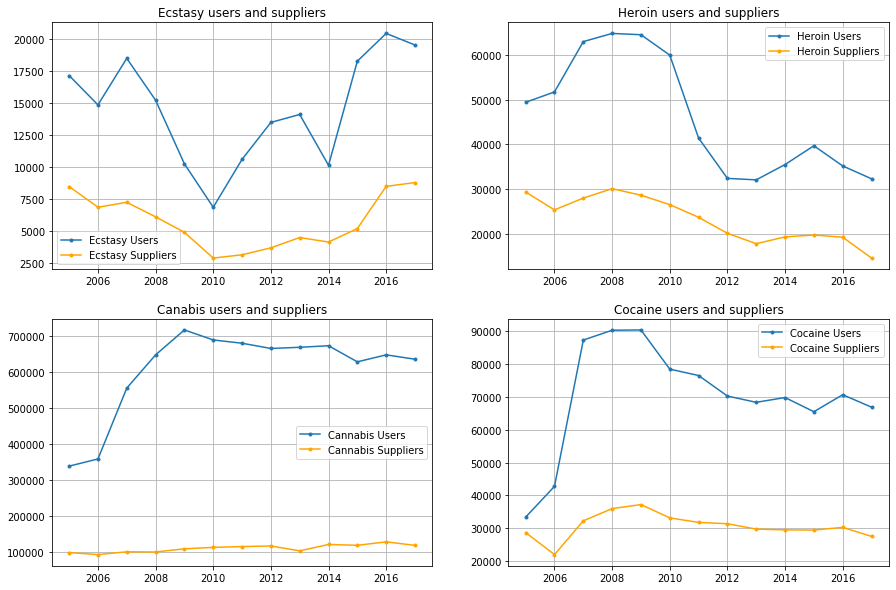

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0, 1].plot(years, num_heroinUsers, label='Heroin Users', marker='.')
axs[0, 1].plot(years, num_heroinSuppliers, color='orange', label = 'Heroin Suppliers', marker='.')
axs[0, 1].legend()
axs[0, 1].grid()
axs[0, 1].set_title("Heroin users and suppliers")

axs[1, 1].plot(years, num_cocaineUsers, label='Cocaine Users', marker='.')
axs[1, 1].plot(years, num_cocaineSuppliers, color='orange', label = 'Cocaine Suppliers', marker='.')
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_title("Cocaine users and suppliers")

axs[1, 0].plot(years, num_cannabisUsers, label='Cannabis Users', marker='.')
axs[1, 0].plot(years, num_cannabisSuppliers, color='orange', label = 'Cannabis Suppliers', marker='.')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 0].set_title("Canabis users and suppliers")

axs[0, 0].plot(years, num_ecstasyUsers, label='Ecstasy Users', marker='.')
axs[0, 0].plot(years, num_ecstasySuppliers, color='orange', label = 'Ecstasy Suppliers', marker='.')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 0].set_title("Ecstasy users and suppliers")

We can see a clear resemblance between the users and suppliers through the years in EU.

In [8]:
ratio = len(num_heroinUsers) * [None]
for i, x in enumerate(num_heroinUsers):
    ratio[i] = num_heroinUsers[i]/num_heroinSuppliers[i]

<BarContainer object of 13 artists>

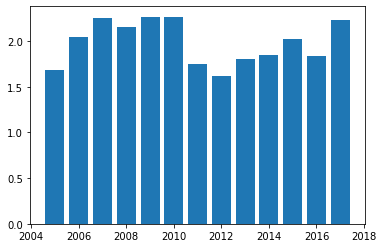

In [9]:
plt.bar(years, ratio) # ratio user : supplier

# everything is wrong down

In [ ]:
# making the data for heroin
heroinUsers = heroinUsers.fillna(0)
years = [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
heroinUsersCountries = pd.DataFrame()
for country in heroinUsers['Country']:
    heroinUsersCountries = heroinUsersCountries.append({'Users': float(heroinUsers[heroinUsers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    
        
heroinSuppliers = heroinSuppliers.fillna(0)
heroinSuppliersCountries = pd.DataFrame()
for country in heroinSuppliers['Country']:
    heroinSuppliersCountries = heroinSuppliersCountries.append({'Suppliers': float(heroinSuppliers[heroinSuppliers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    

heroinData = heroinSuppliersCountries.merge(heroinUsersCountries)
heroinData['Ratio'] = heroinData['Users']/heroinData['Suppliers']

# making the data for cannabis
cannabisUsers = heroinUsers.fillna(0)
cannabisUsersCountries = pd.DataFrame()
for country in cannabisUsers['Country']:
    cannabisUsersCountries = cannabisUsersCountries.append({'Users': float(cannabisUsers[cannabisUsers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    
        
cannabisSuppliers = cannabisSuppliers.fillna(0)
cannabisSuppliersCountries = pd.DataFrame()
for country in cannabisSuppliers['Country']:
    cannabisSuppliersCountries = cannabisSuppliersCountries.append({'Suppliers': float(cannabisSuppliers[cannabisSuppliers['Country'] == country][years].sum(axis=1)), 'Country': country},ignore_index=True)    

cannabisData = cannabisSuppliersCountries.merge(cannabisUsersCountries)
cannabisData['Ratio'] = cannabisData['Users']/cannabisData['Suppliers']


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
heroinData[['Country', 'Users', 'Suppliers']].sort_values(by='Users', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[0])
heroinData[['Country', 'Users', 'Suppliers']].sort_values(by='Suppliers', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[1])

Top 5 countries sorted by Users and sorted by Suppliers

In [ ]:
heroinData[['Country', 'Ratio']].dropna().sort_values(by = 'Ratio', ascending = False).head(5)

Biggest countries with User to Supplier ratio.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
cannabisData[['Country', 'Users', 'Suppliers']].sort_values(by='Users', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[0])
cannabisData[['Country', 'Users', 'Suppliers']].sort_values(by='Suppliers', ascending=False).head(5).plot(x = 'Country', kind='bar', ax = axes[1])

In [ ]:
cannabisData[['Country', 'Users', 'Suppliers']].sort_values(by='Users', ascending=False)